This data was extracted from the census bureau database found at
http://www.census.gov/ftp/pub/DES/www/welcome.html
Donor: Ronny Kohavi and Barry Becker, Data Mining and
Visualization
Silicon Graphics.
e-mail: ronnyk@sgi.com for questions.
Split into train-test using MLC++ GenCVFiles (2/3, 1/3 random).
48842 instances, mix of continuous and discrete (train=32561, test=16281)
45222 if instances with unknown values are removed (train=30162, test=15060)
Duplicate or conflicting instances : 6
Class probabilities for adult.all file

Probability for the label '>50K' : 23.93% / 24.78% (without unknowns)

Probability for the label '<=50K' : 76.07% / 75.22% (without unknowns)

Extraction was done by Barry Becker from the 1994 Census database. A set of
reasonably clean records was extracted using the following conditions:
((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0)) Prediction task is to
determine whether a person makes over 50K a year. Conversion of original data as
follows:

1. Discretized a gross income into two ranges with threshold 50,000.
2. Convert U.S. to US to avoid periods.

3. Convert Unknown to "?"
4. Run MLC++ GenCVFiles to generate data,test. Description of fnlwgt (final weight) The weights on the CPS files are controlled to independent estimates of the civilian noninstitutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are: 
- A single cell estimate of the population 16+ for each state.
- Controls for Hispanic Origin by age and sex.
- Controls by Race, age and sex. We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

Dataset Link
https://archive.ics.uci.edu/ml/machine-learning-databases/adult/

#### Problem 1: Prediction task is to determine whether a person makes over 50K a year.
#### Problem 2: Which factors are important
#### Problem 3: Which algorithms are best for this dataset

In [1]:
#Import the necessary libraries and the data

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz


train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None)
test_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test', skiprows = 1, header = None)

c:\users\leo26\anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [2]:
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation','relationship', 'race', 'sex', 'capital_gain',
'capital_loss', 'hours_per_week', 'native_country', 'wage_class']
train_set.columns = col_labels
test_set.columns = col_labels

In [3]:
train_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
test_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [5]:
train_set.shape, test_set.shape

((32561, 15), (16281, 15))

In [6]:
train_set.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
test_set.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,16281.000000,1.628100e+04,16281.000000,16281.000000,16281.000000,16281.000000
mean,38.767459,1.894357e+05,10.072907,1081.905104,87.899269,40.392236
std,13.849187,1.057149e+05,2.567545,7583.935968,403.105286,12.479332
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.167360e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.778310e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.383840e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,3770.000000,99.000000


In [8]:
#Check for missing values

print(train_set.isnull().sum())
print(test_set.isnull().sum())

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64
age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64


In [9]:
train_set.nunique()

age                  73
workclass             9
fnlwgt            21648
education            16
education_num        16
marital_status        7
occupation           15
relationship          6
race                  5
sex                   2
capital_gain        119
capital_loss         92
hours_per_week       94
native_country       42
wage_class            2
dtype: int64

In [10]:
test_set.nunique()

age                  73
workclass             9
fnlwgt            12787
education            16
education_num        16
marital_status        7
occupation           15
relationship          6
race                  5
sex                   2
capital_gain        113
capital_loss         82
hours_per_week       89
native_country       41
wage_class            2
dtype: int64

In [11]:
for feature in train_set.columns:    
    if train_set[feature].dtype == 'object':
        
        print('_'*10,feature, end=" ",)
        print('_'*10)
        print(train_set[feature].value_counts())

__________ workclass __________
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
__________ education __________
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64
__________ marital_status __________
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name

#### Data Visualization

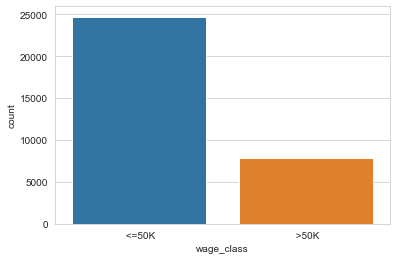

In [12]:
#Let's visualize the data for both train set and test set

sns.set_style("whitegrid")
sns.countplot(x='wage_class', data = train_set)

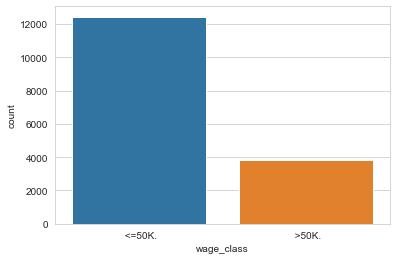

In [13]:
sns.set_style("whitegrid")
sns.countplot(x='wage_class', data = test_set)

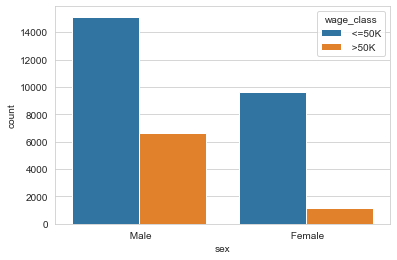

In [14]:
sns.set_style("whitegrid")
sns.countplot(hue='wage_class', x='sex', data = train_set)

[Text(0, 0, ' State-gov'),
 Text(0, 0, ' Self-emp-not-inc'),
 Text(0, 0, ' Private'),
 Text(0, 0, ' Federal-gov'),
 Text(0, 0, ' Local-gov'),
 Text(0, 0, ' ?'),
 Text(0, 0, ' Self-emp-inc'),
 Text(0, 0, ' Without-pay'),
 Text(0, 0, ' Never-worked')]

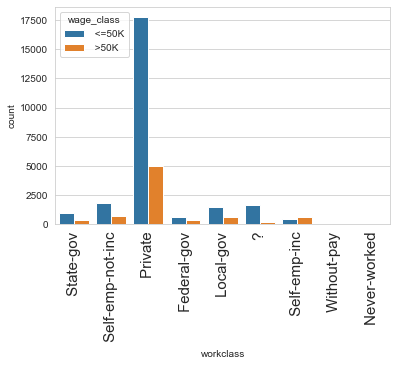

In [15]:
g = sns.countplot(hue='wage_class', x='workclass', data = train_set)
g.set_xticklabels(g.get_xticklabels(), rotation=90, fontsize = 15)

[Text(0, 0, ' Bachelors'),
 Text(0, 0, ' HS-grad'),
 Text(0, 0, ' 11th'),
 Text(0, 0, ' Masters'),
 Text(0, 0, ' 9th'),
 Text(0, 0, ' Some-college'),
 Text(0, 0, ' Assoc-acdm'),
 Text(0, 0, ' Assoc-voc'),
 Text(0, 0, ' 7th-8th'),
 Text(0, 0, ' Doctorate'),
 Text(0, 0, ' Prof-school'),
 Text(0, 0, ' 5th-6th'),
 Text(0, 0, ' 10th'),
 Text(0, 0, ' 1st-4th'),
 Text(0, 0, ' Preschool'),
 Text(0, 0, ' 12th')]

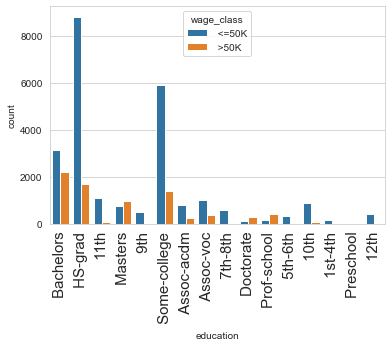

In [16]:
h = sns.countplot(hue='wage_class', x='education', data = train_set)
h.set_xticklabels(h.get_xticklabels(), rotation=90, fontsize = 15)

[Text(0, 0, ' Never-married'),
 Text(0, 0, ' Married-civ-spouse'),
 Text(0, 0, ' Divorced'),
 Text(0, 0, ' Married-spouse-absent'),
 Text(0, 0, ' Separated'),
 Text(0, 0, ' Married-AF-spouse'),
 Text(0, 0, ' Widowed')]

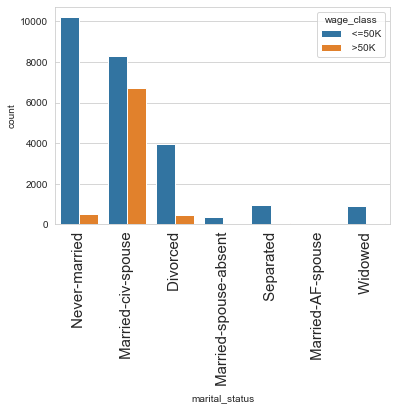

In [17]:
i = sns.countplot(hue='wage_class', x='marital_status', data = train_set)
i.set_xticklabels(i.get_xticklabels(), rotation=90, fontsize = 15)

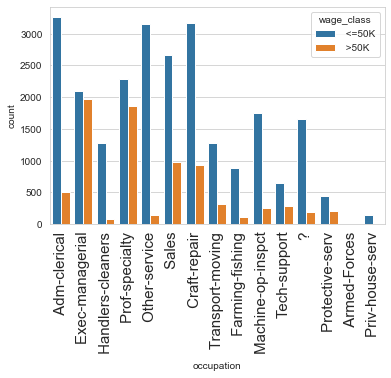

In [18]:
k = sns.countplot("occupation" , data= train_set , hue = 'wage_class')
k.set_xticklabels(k.get_xticklabels(), rotation = 'vertical' , fontsize = 15)
plt.show()

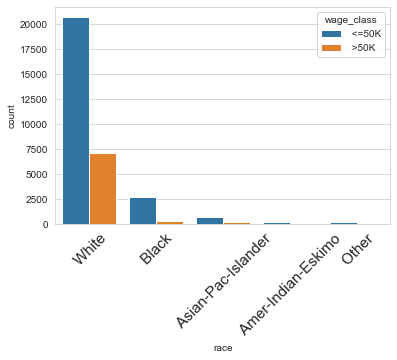

In [19]:
l = sns.countplot("race" , data= train_set , hue = 'wage_class')
l.set_xticklabels(l.get_xticklabels(), rotation = 45 , fontsize = 15)
plt.show()

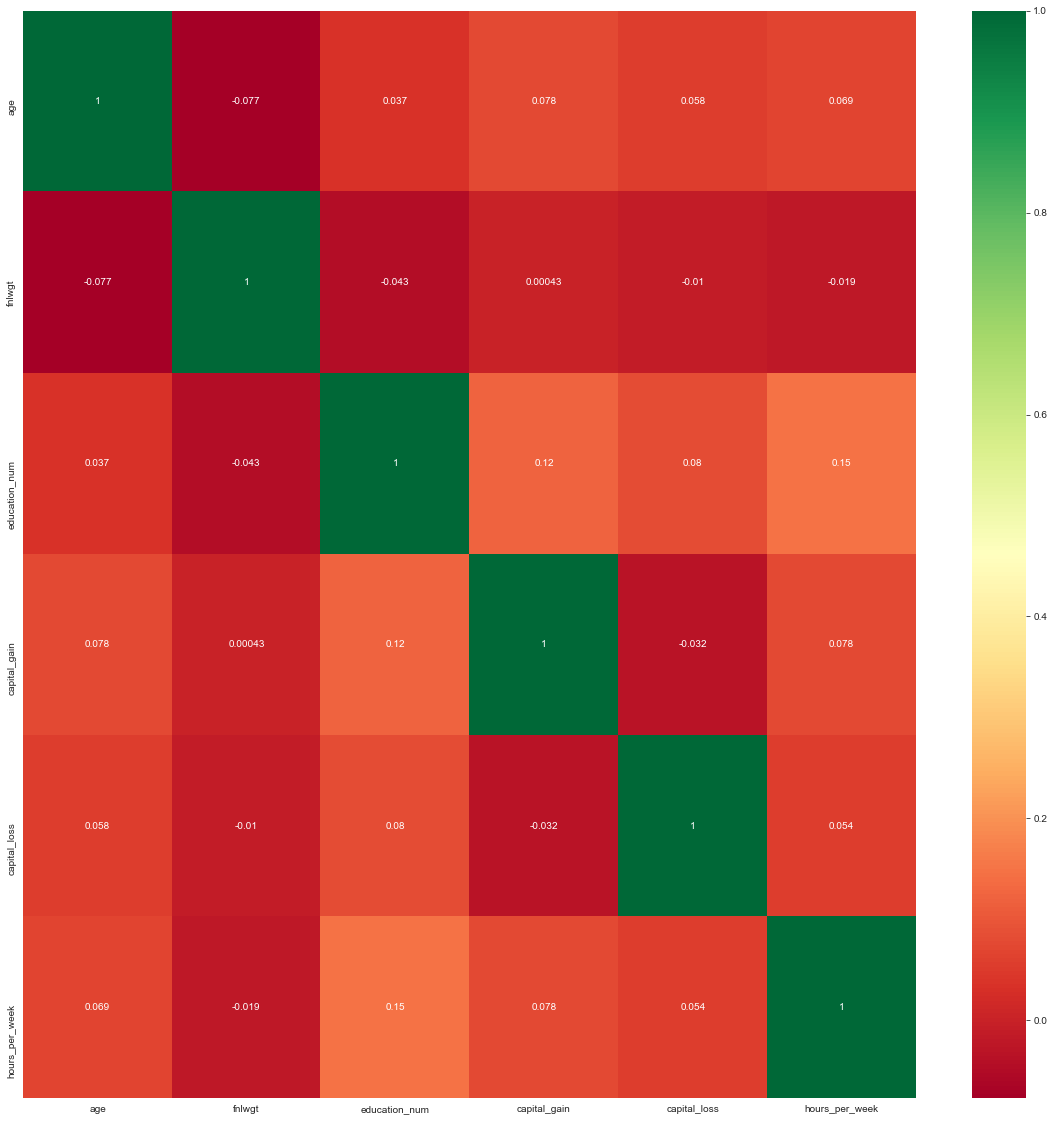

In [20]:
# Selecting correlated features using Heatmap

# Get correlation of all the features of the dataset
corr_matrix = train_set.corr()
top_corr_features = corr_matrix.index

# Plotting the heatmap
plt.figure(figsize=(20,20))
sns.heatmap(data=train_set[top_corr_features].corr(), annot=True, cmap='RdYlGn') # viridis

##### Features Native_counrty, Occupation, workclass are having one value as '?' and that needs to be handled. We can get the index of the ? in the above mentioned columns. 

In [21]:
train_df = train_set.replace(" ?" , np.nan).dropna()

In [22]:
test_df = test_set.replace(" ?" , np.nan).dropna()

####  Feature Engineering 

Let's convert the values in wage_class to 0 and 1. 0 being for wage_class <= 50K and 1 for wage_class > 50K

In [23]:
train_df['wage_class']=train_df['wage_class'].apply(lambda x: 1 if x==" >50K" else 0)

In [24]:
test_df['wage_class']=test_df['wage_class'].apply(lambda x:1 if x==" >50K" else 0)

##### Getting all the categorical columns from the dataframe¶


In [25]:
cat_cols = list(set(train_df.columns) - set(train_df._get_numeric_data().columns))
cat_cols

['sex',
 'native_country',
 'occupation',
 'education',
 'workclass',
 'marital_status',
 'relationship',
 'race']

##### Converting the categorical variables to numerical values

Let's start with the training data

In [26]:
X_train = train_df.copy()
X_test = test_df.copy()

X_train.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [27]:
sex = {}
count = 0
for x in X_train["sex"].unique():
    sex[x] = count
    count += 1



workclass = {}
count = 0
for x in X_train["workclass"].unique():
    workclass[x] = count
    count += 1

    
education = {}
count = 0
for x in X_train["education"].unique():
    education[x] = count
    count +=1

    
marital_status = {}
count = 0
for x in X_train["marital_status"].unique():
    marital_status[x] = count
    count +=1



occupation = {}
count = 0
for x in X_train["occupation"].unique():
    occupation[x] = count
    count += 1
    

relationship = {}
count = 0
for x in X_train["relationship"].unique():
    relationship[x] = count
    count +=1

    
race = {}
count = 0
for x in X_train["race"].unique():
    race[x] = count
    count +=1

    
native_country = {}
count = 0
for x in X_train["native_country"].unique():
    native_country[x] = count
    count +=1


In [28]:
sex, workclass, education, marital_status, occupation, relationship, race, native_country

({' Female': 1, ' Male': 0},
 {' Federal-gov': 3,
  ' Local-gov': 4,
  ' Private': 2,
  ' Self-emp-inc': 5,
  ' Self-emp-not-inc': 1,
  ' State-gov': 0,
  ' Without-pay': 6},
 {' 10th': 12,
  ' 11th': 2,
  ' 12th': 14,
  ' 1st-4th': 15,
  ' 5th-6th': 11,
  ' 7th-8th': 7,
  ' 9th': 4,
  ' Assoc-acdm': 6,
  ' Assoc-voc': 9,
  ' Bachelors': 0,
  ' Doctorate': 8,
  ' HS-grad': 1,
  ' Masters': 3,
  ' Preschool': 13,
  ' Prof-school': 10,
  ' Some-college': 5},
 {' Divorced': 2,
  ' Married-AF-spouse': 5,
  ' Married-civ-spouse': 1,
  ' Married-spouse-absent': 3,
  ' Never-married': 0,
  ' Separated': 4,
  ' Widowed': 6},
 {' Adm-clerical': 0,
  ' Armed-Forces': 12,
  ' Craft-repair': 10,
  ' Exec-managerial': 1,
  ' Farming-fishing': 7,
  ' Handlers-cleaners': 2,
  ' Machine-op-inspct': 8,
  ' Other-service': 4,
  ' Priv-house-serv': 13,
  ' Prof-specialty': 3,
  ' Protective-serv': 11,
  ' Sales': 5,
  ' Tech-support': 9,
  ' Transport-moving': 6},
 {' Husband': 1,
  ' Not-in-family': 0,


In [29]:
X_train.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


#### Mapping numerical variables to the categories

In [30]:
X_train["sex"] = X_train["sex"].map(sex)
X_train["education"] = X_train["education"].map(education)
X_train["native_country"] = X_train["native_country"].map(native_country)
X_train["race"] = X_train["race"].map(race)
X_train["occupation"] = X_train["occupation"].map(occupation)
X_train["marital_status"] = X_train["marital_status"].map(marital_status)
X_train["workclass"] = X_train["workclass"].map(workclass)
X_train["relationship"] = X_train["relationship"].map(relationship)

In [31]:
X_train.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,0,77516,0,13,0,0,0,0,0,2174,0,40,0,0
1,50,1,83311,0,13,1,1,1,0,0,0,0,13,0,0
2,38,2,215646,1,9,2,2,0,0,0,0,0,40,0,0
3,53,2,234721,2,7,1,2,1,1,0,0,0,40,0,0
4,28,2,338409,0,13,1,3,2,1,1,0,0,40,1,0


#### Applying the same to test data

In [32]:
X_test['sex'] = X_test['sex'].map(sex)
X_test['education'] = X_test['education'].map(education)
X_test['native_country'] = X_test['native_country'].map(native_country)
X_test['race'] = X_test['race'].map(race)
X_test['occupation']=X_test['occupation'].map(occupation)
X_test['marital_status'] = X_test['marital_status'].map(marital_status)
X_test['workclass'] = X_test['workclass'].map(workclass)
X_test['relationship'] = X_test['relationship'].map(relationship)

In [33]:
X_test.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,2,226802,2,7,0,8,3,1,0,0,0,40,0,0
1,38,2,89814,1,9,1,7,1,0,0,0,0,50,0,0
2,28,4,336951,6,12,1,11,1,0,0,0,0,40,0,0
3,44,2,160323,5,10,1,8,1,1,0,7688,0,40,0,0
5,34,2,198693,12,6,0,4,0,0,0,0,0,30,0,0


### Choosing the best model and model building

In [34]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report , accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

c:\users\leo26\anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
c:\users\leo26\anaconda3\lib\site-packages\dask\dataframe\utils.py:13: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
c:\users\leo26\anaconda3\lib\site-packages\distributed\config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [35]:
x_train = X_train.drop("wage_class", 1)
y_train = X_train["wage_class"]

x_test = X_test.drop("wage_class", 1)
y_test = X_test["wage_class"]

In [36]:
X = x_train.values
y = y_train.values

Xtest = x_test.values
Ytest = y_test.values

In [37]:
models = []

models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
models.append(('XGB', XGBClassifier()))
models.append(('RF', RandomForestClassifier()))

#testing models

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=5, random_state=42)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)

c:\users\leo26\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
c:\users\leo26\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\leo26\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

In

LR: 0.790034 (0.001148)


c:\users\leo26\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
c:\users\leo26\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
numpy.linalg.LinAlgError: SVD did not converge

  FitFailedWarning)


LDA: nan (nan)


c:\users\leo26\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


KNN: 0.767124 (0.003358)


c:\users\leo26\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


CART: 0.803892 (0.003131)


c:\users\leo26\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


SVM: 0.787846 (0.002567)


c:\users\leo26\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


XGB: 0.866654 (0.002861)
RF: 0.851568 (0.004075)


#### Problem 3: Which algorithm is best for this dataset 

#### Algorithms Comparison

c:\users\leo26\anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


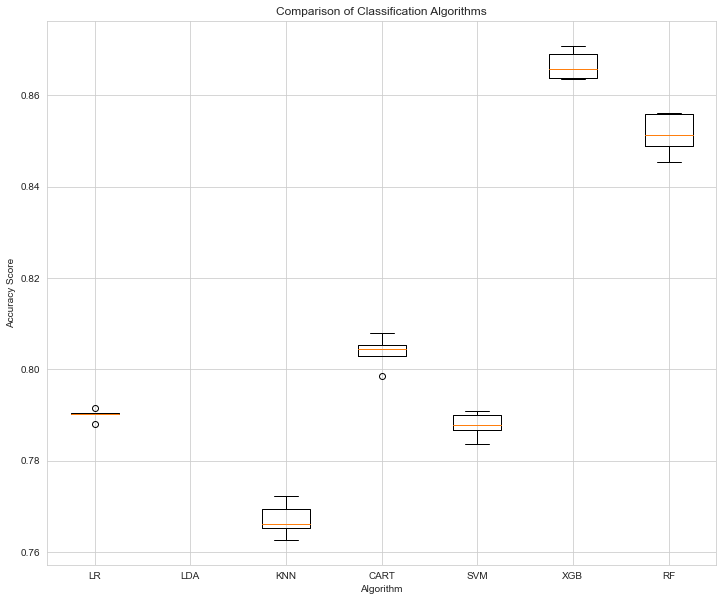

In [38]:
fig = plt.figure(figsize=(12,10))
plt.title('Comparison of Classification Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy Score')
plt.boxplot(results)
ax = fig.add_subplot(111)
ax.set_xticklabels(names)
plt.show()

#### XgBoost is the best model. 

##### We can fit the data on XgBoost. 

In [39]:
# fit model no training data
X_model = XGBClassifier(objective='binary:logistic')
X_model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [40]:
# Checking the training accuracy

y_pred = X_model.predict(x_train)
predictions = [round(value) for value in y_pred]
accuracy_train = accuracy_score(y_train,predictions)
accuracy_train

0.9026921291691532

In [41]:
# Checking the testing accuracy

y_pred2 = X_model.predict(x_test)
predictions2 = [round(value) for value in y_pred2]
accuracy_test = accuracy_score(y_test, predictions2)
accuracy_test

0.7913678618857902

In [42]:
pred_proba = X_model.predict_proba(x_test)
pred_proba

array([[0.9976446 , 0.00235542],
       [0.7082374 , 0.29176262],
       [0.7092875 , 0.29071245],
       ...,
       [0.17921638, 0.8207836 ],
       [0.9365307 , 0.06346928],
       [0.2116062 , 0.7883938 ]], dtype=float32)

In [43]:
# Classification report

from sklearn.metrics import classification_report
print(classification_report(y_test, predictions2))

              precision    recall  f1-score   support

           0       1.00      0.79      0.88     15060
           1       0.00      0.00      0.00         0

    accuracy                           0.79     15060
   macro avg       0.50      0.40      0.44     15060
weighted avg       1.00      0.79      0.88     15060



c:\users\leo26\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


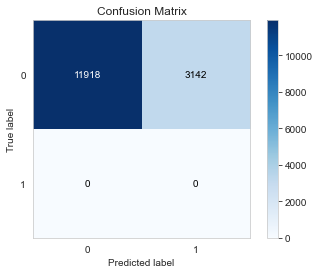

In [44]:
# Confusion Matrix
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, predictions2)
plt.show()

In [45]:
### Hyperparameter tuning for XgBoost to improve the performance

params = {
    "learning_rate"    : [0.5, 0.10, 0.15, 0.20, 0.25, 0.30], 
    "max_depth"        : [3,4,5,6,8,10,12,15],
    "min_child_weight" : [1,3,5,7],
    "gamma"            : [0.0, 0.1, 0.2, 0.3, 0.4],
    "colsample_bytree" : [0.3, 0.4, 0.5, 0.7]
}

In [46]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

RandomSearchCV = RandomizedSearchCV(X_model,
                                   param_distributions=params,
                                   n_iter=5,
                                   scoring="roc_auc",
                                   n_jobs=-1,
                                   cv = 5,
                                   verbose=3)

In [47]:
RandomSearchCV.fit(x_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   25.3s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           gpu_id=-1, importance_type='gain',
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_delta_step=0, max_depth=6,
                                           min_child_weight=1, missing=nan,
                                           monotone_constraints='()',
                                           n_estimators=100...
                                           verbosity=None),
                   iid='deprecated', n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0

In [48]:
RandomSearchCV.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=6,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [49]:
RandomSearchCV.best_params_

{'colsample_bytree': 0.4,
 'gamma': 0.0,
 'learning_rate': 0.25,
 'max_depth': 6,
 'min_child_weight': 5}

In [50]:
## Creating a new tuned model

X_model_new = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.1,
              learning_rate=0.2, max_delta_step=0, max_depth=5,
              min_child_weight=7, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [51]:
score = cross_val_score(X_model_new, x_train,y_train, cv=5)
score

array([0.86573844, 0.86573844, 0.87151857, 0.87350796, 0.86803714])

In [52]:
score.mean()

0.8689081075305977

In [53]:
cv_acc = cross_val_score(X_model_new,
                         x_train,
                         y_train,
                         cv=5,
                         scoring="accuracy")
cv_acc

array([0.86573844, 0.86573844, 0.87151857, 0.87350796, 0.86803714])

In [54]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8689081075305977

In [55]:
cv_precision = cross_val_score(X_model_new,
                         x_train,
                         y_train,
                         cv=5,
                         scoring="precision")
cv_precision

array([0.77416799, 0.78737542, 0.78947368, 0.81112985, 0.78376206])

In [56]:
cv_precision = np.mean(cv_precision)
cv_precision

0.7891817985843571

In [57]:
cv_recall = cross_val_score(X_model_new,
                         x_train,
                         y_train,
                         cv=5,
                         scoring="recall")
cv_recall

array([0.65046605, 0.63115846, 0.65956029, 0.64090606, 0.64913449])

In [58]:
cv_recall = np.mean(cv_recall)
cv_recall

0.6462450687557607

In [59]:
cv_f1 = cross_val_score(X_model_new,
                         x_train,
                         y_train,
                         cv=5,
                         scoring="f1")
cv_f1

array([0.70694645, 0.70066519, 0.71869328, 0.71604019, 0.71012382])

In [60]:
cv_f1 = np.mean(cv_f1)
cv_f1

0.7104937875610242

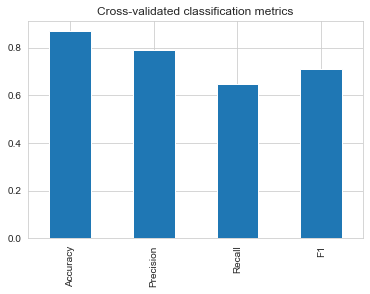

In [61]:
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1},
                          index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                      legend=False);

In [62]:
#Features = x_train 
#Labels = y_train 

In [63]:
#from sklearn.feature_selection import RFE, RFECV
#selector = RFE(estimator = XGBClassifier(), step =1)
#selector.fit(Features, Labels)



In [64]:
#ranks = selector.ranking_.tolist()
#ranks

In [65]:
#df_rank = pd.DataFrame({'Feature': Features.columns, 'Rank': ranks})
#df_rank

#### Problem 2: Which features are important?


In [66]:
# fit model no training data
X_model_new1 = XGBClassifier()
X_model_new1.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [67]:
print(X_model_new1.feature_importances_)

[0.03274686 0.01805504 0.01265405 0.0119562  0.11566273 0.34195808
 0.02740451 0.12066595 0.016412   0.02763843 0.17783059 0.05726908
 0.02612187 0.01362453]


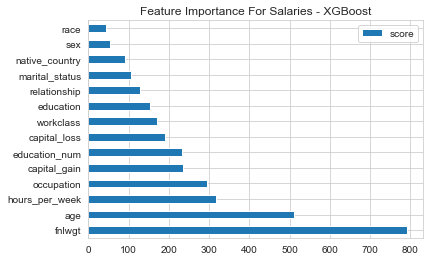

In [68]:
feature_important = X_model_new1.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.plot(kind='barh')
plt.title("Feature Importance For Salaries - XGBoost")
plt.show()